## KNN回归基本使用

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
sns.set()
colors = sns.color_palette("husl")

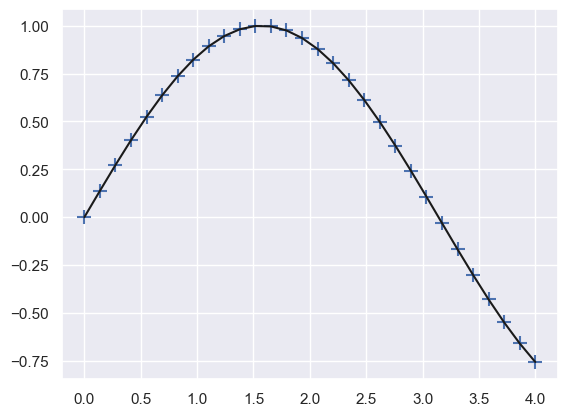

In [5]:
x = np.linspace(0,4,30)
y = np.sin(x)
plt.plot(x,y,color="k")
plt.scatter(x,y,marker="+",s=100)

In [6]:
noise = np.random.random(30)*(0.4)-0.2

In [7]:
y_true = y + noise

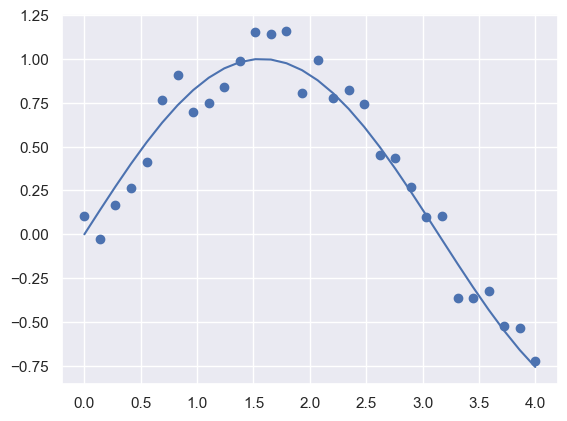

In [9]:
plt.scatter(x,y_true)
plt.plot(x,y)

In [10]:
samples = pd.DataFrame(data={
    "X":x,
    "y":y_true
})
samples

,X,y
0,0.000000,0.104795
1,0.137931,-0.026427
2,0.275862,0.165625
3,0.413793,0.263831
4,0.551724,0.414377
5,0.689655,0.766147
6,0.827586,0.906431
7,0.965517,0.695796
8,1.103448,0.750300
9,1.241379,0.837235


In [12]:
train = pd.DataFrame(samples.X.copy())
target = pd.DataFrame(samples.y.copy())

In [20]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5,weights="uniform")

knn.fit(train,target)

y_ = knn.predict(train)

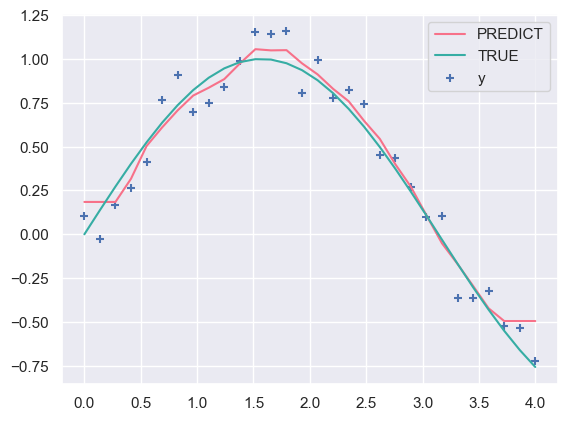

In [21]:
plt.plot(train,y_,label="PREDICT",color=colors[0])
plt.plot(train,y,label="TRUE",color=colors[3])
plt.scatter(train,target,label="y",marker="+")
plt.legend()

In [24]:
test = np.linspace(0,4,38).reshape((-1,1))
test
y1_ = knn.predict(test)

/Users/lianke/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


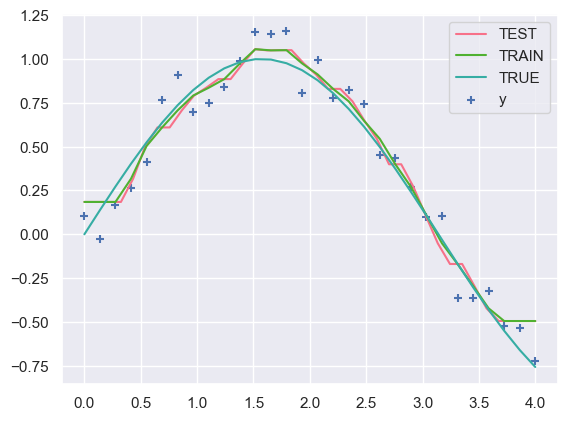

In [29]:
plt.plot(test,y1_,label="TEST",color=colors[0])
plt.plot(train,y_,label="TRAIN",color=colors[2])
plt.plot(train,y,label="TRUE",color=colors[3])
plt.scatter(train,target,label="y",marker="+")
plt.legend()

## 评价

### MSE 均方误差

In [32]:
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston

In [35]:
boston = load_boston()

data = boston.data
target = boston.target
feature_names = boston.feature_names

pd.DataFrame(data=data,columns=feature_names)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [40]:
X_train,X_test,y_train,y_test = train_test_split(data,target,test_size=0.2,random_state=1)

model1 = KNeighborsRegressor(n_neighbors=3)
model2 = KNeighborsRegressor(n_neighbors=13)

def show_train_test_mse(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    train_mse = mean_squared_error(y_train,model.predict(X_train))
    test_mse = mean_squared_error(y_test,model.predict(X_test))
    print(f"TRAIN_MSE:{train_mse}")
    print(f"TEST_MSE:{test_mse}\n")
    
show_train_test_mse(model1,X_train,X_test,y_train,y_test)
show_train_test_mse(model2,X_train,X_test,y_train,y_test)


TRAIN_MSE:17.13389713971397
TEST_MSE:39.76940087145969

TRAIN_MSE:38.73141133048216
TEST_MSE:53.12279150713539



### 残差直方图

In [41]:
test_y1_ = model1.predict(X_test)
test_y2_ = model2.predict(X_test)

train_y1_ = model1.predict(X_train)
train_y2_ = model2.predict(X_train)

In [43]:
loss1 = test_y1_ - y_test
loss2 = test_y2_ - y_test

/Users/lianke/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/lianke/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


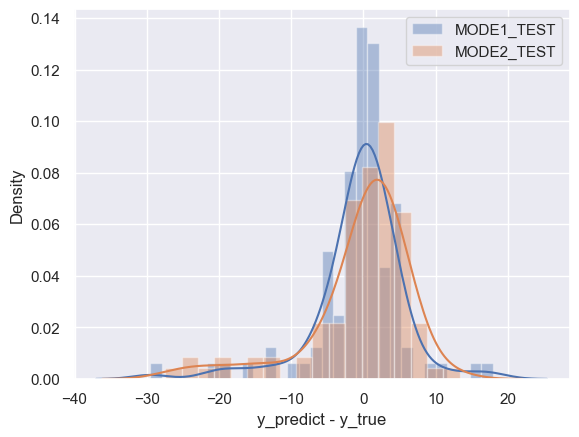

In [49]:
sns.distplot(loss1,label="MODE1_TEST")
sns.distplot(loss2,label="MODE2_TEST")
plt.xlabel("y_predict - y_true")
plt.legend()

### 调参，找最优解

In [51]:
np.sqrt(data.shape[0]*0.8)

20.11964214393487

In [53]:
k_list = np.arange(1,25,step=4)
k_list

array([ 1,  5,  9, 13, 17, 21])

In [66]:
def get_mse_means(k_list,data,target):
    test_mse_mean_list = []
    train_mse_mean_list = []
    for k in k_list:
        model = KNeighborsRegressor(n_neighbors=k)   
        test_mse_list = []
        train_mse_list = []
        for i in range(10):
            X_train,X_test,y_train,y_test = train_test_split(data,target,test_size=0.2,random_state=i)
            model.fit(X_train,y_train)
            test_mse_list.append(mean_squared_error(y_test,model.predict(X_test)))
            train_mse_list.append(mean_squared_error(y_train,model.predict(X_train)))
        test_mse_mean_list.append(np.array(test_mse_list).mean()) 
        train_mse_mean_list.append(np.array(train_mse_list).mean()) 
    return np.array(test_mse_mean_list),np.array(train_mse_mean_list)

Text(0, 0.5, 'MSE')

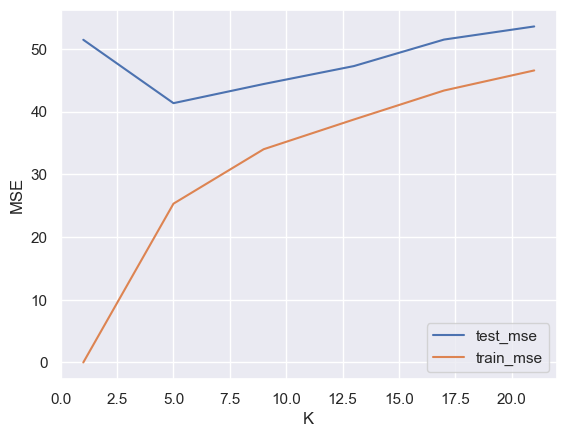

In [67]:
# test_mse_means泛化误差,train_mse_means经验误差
test_mse_means,train_mse_means = get_mse_means(k_list,data,target)
result = pd.DataFrame(data={
    "test_mse":test_mse_means,
    "train_mse":train_mse_means
},index=k_list)
ax = result.plot()
ax.set_xlabel("K")
ax.set_ylabel("MSE")

Text(0, 0.5, 'test-tain(MSE)')

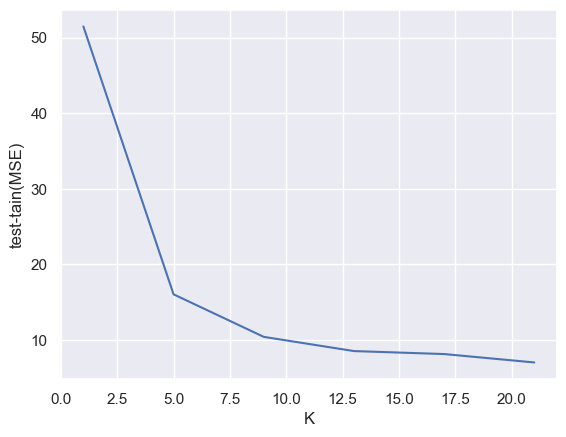

In [68]:
plt.plot(k_list,test_mse_means-train_mse_means)
plt.xlabel("K")
plt.ylabel("test-tain(MSE)")

In [69]:
# 如图可得最佳模型为K=5
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train,y_train)

KNeighborsRegressor()